# Breast cancer Wisconsin diagnostic data set - Kaggle
## Binary classification - methods comparison

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data



Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 


Attribute Information:

=>  Diagnosis (M = malignant, B = benign))

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter) 
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry 
* fractal dimension ("coastline approximation" - 1)


#### Limitations: super small data set!

# Table of Contents:


## 1. [Data set preparation](#first_bullet)
- 1.1 [Read the data set](#read_data)
- 1.2 [Remove ID column](#remove_id)
- 1.3 [Binary 'diagnosis' input](#to_dummies)
- 1.4 [Missing values](#missing_values)
- 1.5 [Class distribution](#class_dist)

## 2. [Testing algorithms](#second_bullet)
- 2.1 [Withouth dimensionality reduction](#without_red)
    > 2.1.1 [Comparison](#sum_1)
- 2.2 [Correlation Coefficient Score](#correlation)
    > 2.2.1 [Comparison](#sum_2)
- 2.3 [Voting classifier](#voting)
    > 2.3.1 [Voting hard](#hard)
    > 2.3.2 [Voting soft](#soft)
    >> 2.3.3 [Comparison](#sum_3)
- 2.4 [Linear SVC + SelectFromModel](#linear_model)
    > 2.4.1 [Comparison](#sum_4)
- 2.5 [Linear SVC + RFECV](#linear_rfecv)
    > 2.5.1 [Comparison](#sum_5)
- 2.6 [Tree-based feature classifier](#tree)
    > 2.6.1 [Comparison](#sum_6)

## 3. [General comparison](#third_bullet)

## Libraries <a class="anchor" id="zero-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data set cleaning <a class="anchor" id="first-bullet"></a>

Read the data set <a class="anchor" id="read_data"></a>

In [3]:
initial_data = pd.read_csv('../input/data.csv')

In [4]:
initial_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Removing 'ID' column <a class="anchor" id="remove_id"></a>

In [5]:
initial_data.drop(initial_data.columns[0], axis=1, inplace=True)

In [6]:
for column in initial_data.columns:
    if "Unnamed" in column:
        initial_data.drop(column, axis = 1, inplace=True)

In [7]:
initial_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Binary diagnosis input <a class="anchor" id="to_dummies"></a>

In [8]:
initial_data['diagnosis']=initial_data['diagnosis'].map({'M':1,'B':0})

In [9]:
initial_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X = initial_data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean',
                 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst']]

y = initial_data['diagnosis']

Missing values <a class="anchor" id="missing values"></a>

In [11]:
col_labels = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean','fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst'
             ]
initial_data.columns = col_labels

In [12]:
for c in col_labels:
    no_missing = initial_data[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    else:
        print(c)
        print("No missing values")
        print(' ')

diagnosis
No missing values
 
radius_mean
No missing values
 
texture_mean
No missing values
 
perimeter_mean
No missing values
 
area_mean
No missing values
 
smoothness_mean
No missing values
 
compactness_mean
No missing values
 
concavity_mean
No missing values
 
concave_points_mean
No missing values
 
symmetry_mean
No missing values
 
fractal_dimension_mean
No missing values
 
radius_se
No missing values
 
texture_se
No missing values
 
perimeter_se
No missing values
 
area_se
No missing values
 
smoothness_se
No missing values
 
compactness_se
No missing values
 
concavity_se
No missing values
 
concave points_se
No missing values
 
symmetry_se
No missing values
 
fractal_dimension_se
No missing values
 
radius_worst
No missing values
 
texture_worst
No missing values
 
perimeter_worst
No missing values
 
area_worst
No missing values
 
smoothness_worst
No missing values
 
compactness_worst
No missing values
 
concavity_worst
No missing values
 
concave points_worst
No missing val

Class distribution <a class="anchor" id="class_dist"></a>

#### Set is not perfectly balanced, however the differene in class distribution is not that significant to apply solutions dedicated for highly imbalanced cases.

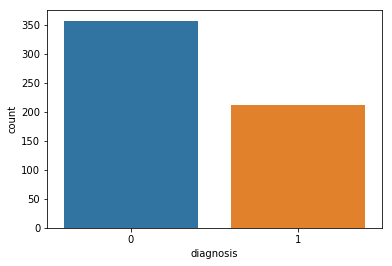

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(initial_data['diagnosis'],label="Sum")

plt.show()

## Testing algorithms <a class="anchor" id="second-bullet"></a>

### [Data set without dimensionality reduction](#without_red)

### Dimensionality reduction:

### [Correlation coefficient score](#correlation)
### [Voting classifier](#voting)
### [Linear SVC + SelectFromModel](#linear_model)
### [Linear SVC + RFECV](#linear_rfecv)
### [Tree-based feature selection](#tree)
#### Classifiers:

* Logistic Regression
* Decision Tree
* Support Vector Machine
* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Random Forest
* K-Nearest Neighbors
* Naive Bayes

#### Scoring:

* precision score
* recall score
* F1 score
* support score
* accuracy score
* AUC/ROC

## Withouth reduction <a class="anchor" id="without_red"></a>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

#### Logistic Regression

In [15]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [16]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### Support Vector Machine

In [17]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [18]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [19]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [20]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [21]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [22]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_1"></a>

In [23]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
3,Linear Discriminant Analysis,0.009501,0.006074,0.948757,0.959455,0.928571,0.947142,0.993056
4,Quadratic Discriminant Analysis,0.025576,0.007102,0.943480,0.939012,0.941415,0.943893,0.989324
0,Logistic Regression,0.005698,0.002642,0.943348,0.945292,0.932303,0.943039,0.989973
5,Random Forest,0.019400,0.010027,0.941126,0.944909,0.928457,0.940401,0.982154
6,K-Nearest Neighbors,0.001198,0.005037,0.935848,0.943361,0.916987,0.934030,0.954365
7,Bayes,0.001405,0.003164,0.930994,0.931379,0.917903,0.930448,0.979380
1,Decision Tree,0.004518,0.002991,0.913611,0.910028,0.905266,0.913109,0.905266
2,Support Vector Machine,0.043556,0.004701,0.656404,0.328202,0.500000,0.520314,0.927053


## Correlation <a class="anchor" id="correlation"></a>

librimind.com: 'Data columns with very similar trends are also likely to carry very similar information. In this case, only one of them will suffice to feed the machine learning model. Here we calculate the correlation coefficient between numerical and nominal columns as the Coefficient and the Pearson’s chi square value respectively. Pairs of columns with correlation coefficient higher than a threshold are reduced to only one.

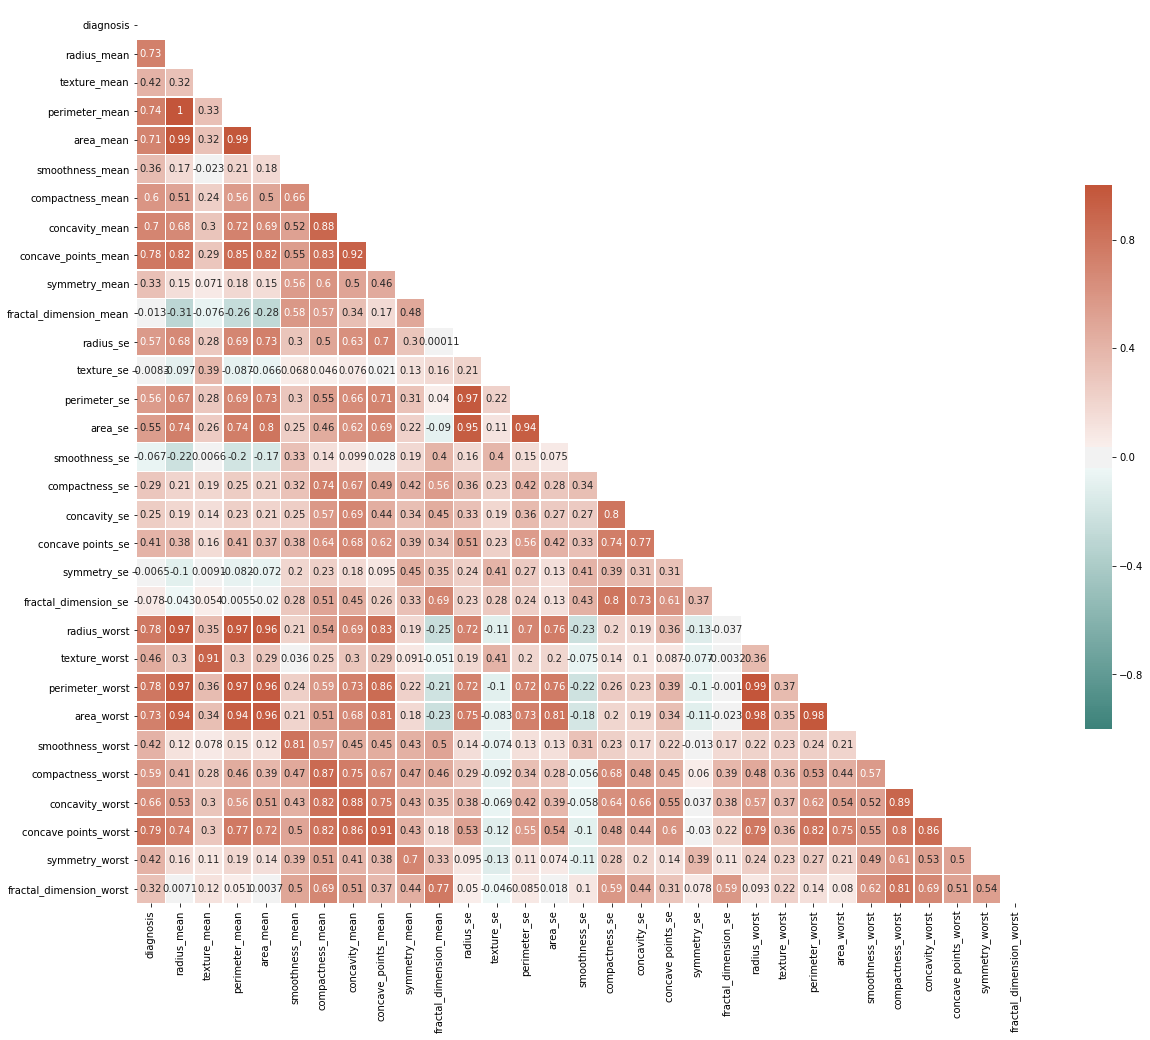

In [24]:
correlation = initial_data.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [25]:
X_corr = initial_data[['smoothness_mean', 'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se', 
                       'fractal_dimension_se', 'texture_worst', 'symmetry_worst','fractal_dimension_worst']]
y_corr = initial_data['diagnosis']

* One of the data set's hallmarks is relatively high correlation coefficient score - only score no higher than 0.6 will be considered acceptable.
* Correlation not necceserily means causation, that is why features will not be exluded only for their low correlation with diagnosis (in the heatmap below diagnosis skipped).

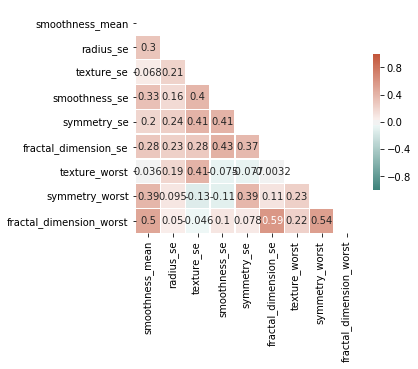

In [26]:
correlation = X_corr.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Features to  be included: 'smoothness_mean', 'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'symmetry_worst', 'fractal_dimension_worst'.

Dividing the dataset into a separate training and test set:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

#### Logistic Regression

In [28]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [29]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### Support Vector Machine

In [30]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [31]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [32]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [33]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [34]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [35]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_2"></a>

In [36]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_correlation.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.015951,0.010189,0.957895,0.962022,0.951786,0.956882,0.986905
3,Linear Discriminant Analysis,0.013732,0.009610,0.955263,0.966818,0.940774,0.953764,0.991071
4,Quadratic Discriminant Analysis,0.007461,0.003740,0.955263,0.955739,0.954167,0.955183,0.991667
0,Logistic Regression,0.007758,0.002585,0.952485,0.956180,0.945942,0.951654,0.988095
7,Bayes,0.001658,0.003366,0.941649,0.946522,0.932955,0.940524,0.989286
1,Decision Tree,0.005089,0.002651,0.926023,0.925881,0.921943,0.925142,0.921943
6,K-Nearest Neighbors,0.001232,0.005051,0.912865,0.917830,0.901109,0.910689,0.960092
2,Support Vector Machine,0.044902,0.004764,0.629283,0.314641,0.500000,0.486132,0.943209


## Voting classifier <a class="anchor" id="voting"></a>


Documentation: If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [37]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         SVC(probability = True),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [39]:
for model in models:
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=20)
    #print(model, scores['fit_time'].mean(), scores['score_time'].mean(), scores['test_accuracy'].mean(),
          #scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean(), 
          #scores['test_f1_weighted'].mean(), scores['test_roc_auc'].mean())

### Hard <a class="anchor" id="hard"></a>

In [40]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

### Soft <a class="anchor" id="soft"></a>

In [41]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
prob = model_ens.predict_proba(X_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

### Comparison <a class="anchor" id="sum_3"></a>

In [42]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Ensembling_soft,0.963918,0.984127,0.911765,0.946565,0.996148
0,Ensebling_hard,0.958763,1.000000,0.882353,0.937500,not applicable


# Linear SVC + SelectFromModel <a class="anchor" id="linear_model"></a>


Documentation: Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with feature_selection.SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the linear_model.Lasso for regression, and of linear_model.LogisticRegression and svm.LinearSVC for classification.

In [43]:
X.shape

(569, 30)

In [44]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_svc = model.transform(X)
X_svc.shape #reduction from 30 to 10 features

(569, 10)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_svc,y,test_size=0.34)

#### Decision Tree

In [46]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [47]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### Support Vector Machine

In [48]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [49]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [50]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [51]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [52]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [53]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_4"></a>

In [54]:
models_sfm = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_sfm.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
3,Linear Discriminant Analysis,0.009287,0.002446,0.968231,0.975702,0.959524,0.967616,0.997531
4,Quadratic Discriminant Analysis,0.015533,0.002980,0.960307,0.963207,0.957170,0.960083,0.991139
0,Logistic Regression,0.003222,0.002542,0.951433,0.954941,0.948417,0.951074,0.991403
5,Random Forest,0.013477,0.009666,0.949225,0.953466,0.944183,0.948905,0.980533
6,K-Nearest Neighbors,0.000613,0.004402,0.938523,0.942417,0.933320,0.938138,0.968791
7,Bayes,0.000802,0.002723,0.920088,0.931363,0.907021,0.917264,0.975318
1,Decision Tree,0.001552,0.002356,0.917178,0.922126,0.916558,0.916936,0.916558
2,Support Vector Machine,0.029257,0.003744,0.618655,0.309327,0.500000,0.472975,0.888007


# Linear SVC + RFECV <a class="anchor" id="linear_rfecv"></a>


From documentation: Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. RFECV performs RFE in a cross-validation loop to find the optimal number of features.

In [55]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False)
model = RFECV(estimator=lsvc, step=1, cv=20).fit(X,y)
X_rfecv = model.transform(X)
X_rfecv.shape #reduction from 30

(569, 20)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_rfecv,y,test_size=0.34)

#### Decision Tree

In [57]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [58]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### Support Vector Machine

In [59]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [60]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [61]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [62]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [63]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [64]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_5"></a>

In [65]:
models_rfecv = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_rfecv.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
3,Linear Discriminant Analysis,0.022822,0.002513,0.968275,0.977312,0.957143,0.967416,0.994048
5,Random Forest,0.021600,0.006660,0.968275,0.974126,0.961607,0.967821,0.978761
4,Quadratic Discriminant Analysis,0.005288,0.003512,0.963012,0.963984,0.960417,0.962952,0.995184
0,Logistic Regression,0.005014,0.002326,0.962556,0.968197,0.955357,0.962083,0.989123
7,Bayes,0.000836,0.002815,0.946930,0.949710,0.940287,0.946462,0.987689
6,K-Nearest Neighbors,0.000615,0.004514,0.933462,0.943696,0.918858,0.931681,0.951190
1,Decision Tree,0.002881,0.002422,0.920141,0.917889,0.918669,0.920206,0.918669
2,Support Vector Machine,0.036472,0.003947,0.632104,0.316052,0.500000,0.489640,0.943669


# Tree-based feature selection <a class="anchor" id="tree"></a>


Documentation: Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute feature importances, which in turn can be used to discard irrelevant features (when coupled with the sklearn.feature_selection.SelectFromModel meta-transformer).

In [66]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
etc = ExtraTreesClassifier()
etc.fit(X, y)

model = SelectFromModel(etc, prefit=True)
X_etc = model.transform(X)
X_etc.shape 

(569, 10)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

#### Decision Tree

In [68]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [69]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### Support Vector Machine

In [70]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [71]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [72]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [73]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [74]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [75]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_6"></a>

In [76]:
models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_tree.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.019746,0.006949,0.955117,0.956754,0.949702,0.954665,0.985714
3,Linear Discriminant Analysis,0.020771,0.006128,0.954644,0.965192,0.939583,0.953016,0.988690
4,Quadratic Discriminant Analysis,0.030104,0.004109,0.951703,0.953655,0.951515,0.951747,0.988095
0,Logistic Regression,0.005199,0.002582,0.947222,0.950305,0.940476,0.946847,0.991071
1,Decision Tree,0.004366,0.002542,0.947059,0.947214,0.944345,0.947020,0.944345
7,Bayes,0.001361,0.003089,0.934064,0.940789,0.922619,0.933142,0.988690
6,K-Nearest Neighbors,0.001186,0.004986,0.920141,0.926842,0.909740,0.919071,0.954843
2,Support Vector Machine,0.043532,0.004507,0.632104,0.316052,0.500000,0.489640,0.914989


# General comparison <a class="anchor" id="third_bullet"></a>

In [77]:
model_general = pd.concat([models_initial['Model'], models_initial['Accuracy'], 
                           models_correlation['Model'],models_correlation['Accuracy'],
                          models_sfm['Model'], models_sfm['Accuracy'],
                          models_rfecv['Model'], models_rfecv['Accuracy'],
                          models_tree['Model'], models_tree['Accuracy'],
                          models_ensembling['Model'], models_ensembling['Accuracy']]
                          , axis=1)

model_general.columns = ['W/out reduction', 'Accuracy', 'Correlation', 'Accuracy_corr',
                        'Linear+SFM', 'Accuracy_sfm', 'Linear+RFECV', 'Accuracy_RFECV', 'Extra trees',
                         'Accuracy_trees', 'Voting', 'Accuracy_voting']

model_general.sort_values(by='Accuracy', ascending=False)

,W/out reduction,Accuracy,Correlation,Accuracy_corr,Linear+SFM,Accuracy_sfm,Linear+RFECV,Accuracy_RFECV,Extra trees,Accuracy_trees,Voting,Accuracy_voting
3,Linear Discriminant Analysis,0.948757,Linear Discriminant Analysis,0.955263,Linear Discriminant Analysis,0.968231,Linear Discriminant Analysis,0.968275,Linear Discriminant Analysis,0.954644,NaN,NaN
4,Quadratic Discriminant Analysis,0.943480,Quadratic Discriminant Analysis,0.955263,Quadratic Discriminant Analysis,0.960307,Quadratic Discriminant Analysis,0.963012,Quadratic Discriminant Analysis,0.951703,NaN,NaN
0,Logistic Regression,0.943348,Logistic Regression,0.952485,Logistic Regression,0.951433,Logistic Regression,0.962556,Logistic Regression,0.947222,Ensebling_hard,0.958763
5,Random Forest,0.941126,Random Forest,0.957895,Random Forest,0.949225,Random Forest,0.968275,Random Forest,0.955117,NaN,NaN
6,K-Nearest Neighbors,0.935848,K-Nearest Neighbors,0.912865,K-Nearest Neighbors,0.938523,K-Nearest Neighbors,0.933462,K-Nearest Neighbors,0.920141,NaN,NaN
7,Bayes,0.930994,Bayes,0.941649,Bayes,0.920088,Bayes,0.946930,Bayes,0.934064,NaN,NaN
1,Decision Tree,0.913611,Decision Tree,0.926023,Decision Tree,0.917178,Decision Tree,0.920141,Decision Tree,0.947059,Ensembling_soft,0.963918
2,Support Vector Machine,0.656404,Support Vector Machine,0.629283,Support Vector Machine,0.618655,Support Vector Machine,0.632104,Support Vector Machine,0.632104,NaN,NaN


Note! Logistic regression, Lineard and Quadratic Discriminant Analysis, and Random Forest algorithms are themselves used for adjusting number of features. That means that applying additional reduction (corelation, SelectFromModel, REFCV) the dimensionality can be reduced more that once.